In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, classification_report
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'



#### 读取数据

In [2]:
train_data = pd.read_csv('KDDTrain+.txt', sep=',',header= None)

train_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

train_data = train_data.dropna()
train_data.head()


d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,26,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [3]:
test_data = pd.read_csv('KDDTest+.txt', sep=',',header= None)
test_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

test_data = test_data.dropna()
test_data.head()

d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15.0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11.0


In [4]:
columns_set1 = set(train_data['outcome'])
columns_set2 = set(test_data['outcome'])

# 找到 df1 中不在 df2 中的列
columns_diff1 = columns_set1 - columns_set2

# 找到 df2 中不在 df1 中的列
columns_diff2 = columns_set2 - columns_set1

# 打印结果
print("Columns in df1 but not in df2:", columns_diff1)
print("Columns in df2 but not in df1:", columns_diff2)


Columns in df1 but not in df2: {'warezclient', 'spy'}
Columns in df2 but not in df1: {'named', 'mailbomb', 'xterm', 'apache2', 'ps', 'snmpguess', 'mscan', 'xsnoop', 'sendmail', 'saint', 'udpstorm', 'snmpgetattack', 'worm', 'httptunnel', 'sqlattack', 'processtable', 'xlock'}


In [5]:
outcome_count = dict(train_data['outcome'].value_counts())

#### 将字符串数字转化成文本

In [6]:
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())

text_columns = test_data.select_dtypes(include=['object'])
print(text_columns.head())

  protocol_type   service flag srv_serror_rate rerror_rate  \
0           tcp  ftp_data   SF            0.00        0.00   
1           udp     other   SF            0.00        0.00   
2           tcp   private   S0            1.00        0.00   
3           tcp      http   SF            0.20        0.00   
4           tcp      http   SF            0.00        0.00   

  dst_host_srv_rerror_rate  outcome  
0                     0.00   normal  
1                     0.00   normal  
2                     0.00  neptune  
3                     0.01   normal  
4                     0.00   normal  
  protocol_type   service  flag dst_host_srv_rerror_rate  outcome
0           tcp   private   REJ                     1.00  neptune
1           tcp   private   REJ                     1.00  neptune
2           tcp  ftp_data    SF                     0.00   normal
3          icmp     eco_i    SF                     0.00    saint
4           tcp    telnet  RSTO                     0.71    mscan


In [7]:
train_data["dst_host_srv_rerror_rate"] = train_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["srv_serror_rate"] = train_data["srv_serror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["rerror_rate"] = train_data["rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data = train_data.reset_index()
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())


test_data["dst_host_srv_rerror_rate"] = test_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
text_columns = test_data.select_dtypes(include=['object'])
test_data = test_data.reset_index()
print(text_columns.head())

#print(train_data.isna().sum().sum())

  protocol_type   service flag  outcome
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  neptune
3           tcp      http   SF   normal
4           tcp      http   SF   normal
  protocol_type   service  flag  outcome
0           tcp   private   REJ  neptune
1           tcp   private   REJ  neptune
2           tcp  ftp_data    SF   normal
3          icmp     eco_i    SF    saint
4           tcp    telnet  RSTO    mscan


#### 至此，获得干净的元数据，train_data,test_data,开始数据预处理

In [8]:
train_data.head()
test_data.head()

,index,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,0,tcp,private,REJ,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
1,1,0,tcp,private,REJ,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
2,2,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21.0
3,3,0,icmp,eco_i,SF,20,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15.0
4,4,1,tcp,telnet,RSTO,0,15,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11.0


* 文字转化成0-1向量

In [9]:
#train_data =pd.concat([train_data, pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])], axis=1)

train_data_text = pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])
#del train_data_text['protocol_type']
#del train_data_text['service']
#del train_data_text['flag']
train_data_text.head()


#test_data =pd.concat([test_data, pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])], axis=1)

test_data_text = pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])
#del test_data_text['protocol_type']
#del test_data_text['service']
#del test_data_text['flag']

df_zeros = pd.DataFrame(0, index=range(len(test_data_text)), columns=['service_aol', 'service_urh_i', 'service_http_2784', 'service_http_8001', 'service_harvest', 'service_red_i'])

#df_zeros.head()
test_data_text = pd.concat([test_data_text, df_zeros],axis = 1).reindex(columns=train_data_text.columns).reset_index()
del test_data_text["index"]
test_data_text.head()


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
test_data_text.columns

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2', 's

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


columns_used = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']
# 初始化标准化器和归一化器
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 对列进行标准化
scaled_columns = scaler.fit_transform(train_data[columns_used])
train_data_standardized = pd.DataFrame(scaled_columns, columns=[columns_used])
test_data_standardized = pd.DataFrame(scaler.transform(test_data[columns_used]), columns=[columns_used])



normalized_columns = minmax_scaler.fit_transform(train_data_standardized[columns_used])
train_data_normalized = pd.DataFrame(normalized_columns, columns=[columns_used])
test_data_normalized = pd.DataFrame(minmax_scaler.transform(test_data_standardized[columns_used]), columns=[columns_used])




d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [12]:
test_data_normalized.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1.000000
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1.000000
2,0.000047,9.408217e-06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1.000000
3,0.000000,1.449313e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0.714286
4,0.000023,0.000000e+00,1.145093e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.523810


In [13]:
def process_column_value(value):
    if value == 'normal':
        return 0
    else:
        return 1


print(train_data_normalized.shape,train_data_normalized.isna().sum().sum())
print(train_data_text.shape,train_data_text.isna().sum().sum())
x_train = pd.concat([train_data_text,train_data_normalized],axis = 1)
#del x_train["index"]
print(x_train.isna().sum().sum())

y_train = train_data['outcome']
y_train_2 = y_train.apply(process_column_value)

x_test = pd.concat([test_data_text,test_data_normalized],axis = 1)
#del x_test["index"]
y_test = test_data['outcome']
y_test_2 = y_test.apply(process_column_value)
print(x_test.isna().sum().sum())


(125968, 39) 0
(125968, 84) 0
0
0


In [14]:

x_test.shape

(22542, 123)

#### 降维

In [15]:
from sklearn.decomposition import PCA



# 初始化 PCA 模型，并指定降维后的维度
n_components = 42 # 降维后的维度
pca = PCA(n_components=n_components)

# 将高维特征数据进行降维
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


# 创建降维后的 DataFrame
x_train_pca = pd.DataFrame(data=x_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
x_test_pca = pd.DataFrame(data=x_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# 打印降维后的 DataFrame
#print(x_train_pca)
pca.explained_variance_ratio_
#x_train_pca.head()


d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.4113425 , 0.15618438, 0.10938587, 0.05077846, 0.04094998,
       0.02814883, 0.02262655, 0.01978436, 0.01497969, 0.01378273,
       0.01131669, 0.00977357, 0.00676433, 0.00655657, 0.00630557,
       0.00544941, 0.004512  , 0.00406786, 0.0037714 , 0.00348688,
       0.00338198, 0.00296132, 0.00256203, 0.0023458 , 0.00214682,
       0.0018448 , 0.00170366, 0.00166247, 0.00156568, 0.00148761,
       0.00141475, 0.00135166, 0.00131221, 0.00129396, 0.00128166,
       0.00127594, 0.00125048, 0.00120791, 0.00116549, 0.00114315,
       0.00113557, 0.00112348])

#### 二分类

##### 贝叶斯

In [16]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = MultinomialNB()

# 训练分类器
nb_classifier.fit(x_train, y_train_2)

# 使用分类器进行预测
y_pred = nb_classifier.predict(x_test)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_2, y_pred))

model_filename = "MultinomialNB_2.pkl"
joblib.dump(nb_classifier, model_filename)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9710
           1       0.97      0.60      0.74     12832

    accuracy                           0.76     22542
   macro avg       0.81      0.78      0.76     22542
weighted avg       0.83      0.76      0.75     22542



d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


['MultinomialNB_2.pkl']

#### 决策树

In [15]:
from sklearn.tree import DecisionTreeClassifier


# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=42,criterion = 'gini')

# 训练模型
clf.fit(x_train_pca, y_train_2)

# 预测测试集
y_pred = clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_2, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_2, y_pred))

#model_filename = "DecisionTree_2.pkl"
#joblib.dump(clf, model_filename)


Accuracy: 0.8630556294916156
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      9710
           1       0.97      0.79      0.87     12832

    accuracy                           0.86     22542
   macro avg       0.87      0.88      0.86     22542
weighted avg       0.88      0.86      0.86     22542



##### 随机森林

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林分类器并设置树的数量为 50
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

rf_classifier.fit(x_train_pca, y_train_2)

y_pred = rf_classifier.predict(x_test_pca)

accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test_2, y_pred))

model_filename = "rf_classifier_2.pkl"
joblib.dump(rf_classifier, model_filename)


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      9710
           1       0.97      0.72      0.83     12832

    accuracy                           0.83     22542
   macro avg       0.85      0.85      0.83     22542
weighted avg       0.86      0.83      0.83     22542



['rf_classifier_2.pkl']

#### 多层感知机

In [71]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(115), max_iter=100, random_state=42) #100

# 训练模型
mlp_clf.fit(x_train_pca, y_train_2)

# 预测测试集
y_pred = mlp_clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_2, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_2, y_pred))
model_filename = "MLPClassifier_2.pkl"
joblib.dump(mlp_clf, model_filename)

Accuracy: 0.8776062461183568
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      9710
           1       0.94      0.84      0.89     12832

    accuracy                           0.88     22542
   macro avg       0.88      0.88      0.88     22542
weighted avg       0.88      0.88      0.88     22542



['MLPClassifier_2.pkl']

In [72]:

#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
accuracy_search = {}
for i in range(80,130,5):
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=(i), max_iter=100, random_state=42) #100

    # 训练模型
    mlp_clf.fit(x_train_pca, y_train_2)

    # 预测测试集
    y_pred = mlp_clf.predict(x_test_pca)

    # 计算准确度
    accuracy = accuracy_score(y_test_2, y_pred)
    #print("Accuracy:", accuracy)
    print(i,"Accuracy:", accuracy)
    accuracy_search[i] = accuracy
    #print(classification_report(y_test_2, y_pred))
    #model_filename = "MLPClassifier_2.pkl"
    #joblib.dump(mlp_clf, model_filename)


80 Accuracy: 0.8632330760358442
85 Accuracy: 0.8493478839499601
90 Accuracy: 0.8577765948008162
95 Accuracy: 0.8532073462869311
100 Accuracy: 0.854804365184988
105 Accuracy: 0.86221275840653
110 Accuracy: 0.8610149942329873
115 Accuracy: 0.8776062461183568
120 Accuracy: 0.8634105225800728
125 Accuracy: 0.8595510602431018


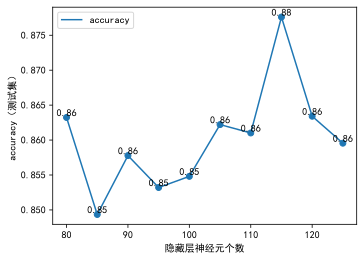

In [95]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.xlabel('隐藏层神经元个数')
plt.ylabel('accuracy（测试集）')

# 在每个点上添加文本标签
for x, y in zip(accuracy_search.keys(), accuracy_search.values()):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.plot(accuracy_search.keys(),accuracy_search.values(), label='accuracy')

plt.scatter(accuracy_search.keys(), accuracy_search.values())



plt.legend()

plt.show()


In [77]:

mlp = MLPClassifier(hidden_layer_sizes=(115), max_iter=100, random_state=42)

# 初始化空列表来存储训练过程中的损失和准确度
train_losses = []
train_accuracies = []
test_accuracies = []

# 训练MLP模型并记录训练过程中的损失和准确度
for i in range(mlp.max_iter):
    mlp.partial_fit(x_train_pca, y_train_2,classes=np.unique(y_train_2))
    
    # 在训练集上计算损失和准确度
    train_loss = mlp.loss_
    train_accuracy = accuracy_score(y_train_2, mlp.predict(x_train_pca))
    
    # 在测试集上计算损失和准确度
    test_accuracy = accuracy_score(y_test_2, mlp.predict(x_test_pca))
    
    # 将损失和准确度记录到列表中
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if i % 10 == 0:
        print(f"Iteration {i}: Train Loss {train_loss:.4f}, "
              f"Train Accuracy {train_accuracy:.4f}, Test Accuracy {test_accuracy:.4f}")




Iteration 0: Train Loss 0.1002, Train Accuracy 0.9923, Test Accuracy 0.8408
Iteration 10: Train Loss 0.0059, Train Accuracy 0.9978, Test Accuracy 0.8619
Iteration 20: Train Loss 0.0033, Train Accuracy 0.9986, Test Accuracy 0.8701
Iteration 30: Train Loss 0.0026, Train Accuracy 0.9988, Test Accuracy 0.8737
Iteration 40: Train Loss 0.0023, Train Accuracy 0.9989, Test Accuracy 0.8774
Iteration 50: Train Loss 0.0021, Train Accuracy 0.9991, Test Accuracy 0.8772
Iteration 60: Train Loss 0.0020, Train Accuracy 0.9991, Test Accuracy 0.8783
Iteration 70: Train Loss 0.0019, Train Accuracy 0.9992, Test Accuracy 0.8815
Iteration 80: Train Loss 0.0019, Train Accuracy 0.9992, Test Accuracy 0.8811
Iteration 90: Train Loss 0.0018, Train Accuracy 0.9992, Test Accuracy 0.8802


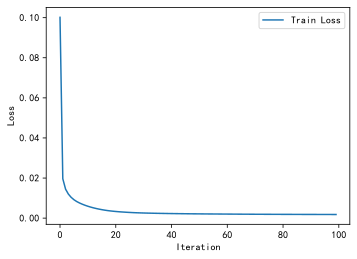

In [96]:
# 可视化损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [97]:
print(max(test_accuracies))

0.8815987933634992


In [26]:
#### SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 初始化多分类 SVM 模型（默认使用 OvR 策略）
svm_classifier = SVC(kernel='rbf')

# 训练模型
svm_classifier.fit(x_train_pca, y_train_2)

# 预测测试数据
y_pred = svm_classifier.predict(x_test_pca)

# 计算准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')

"\nfrom sklearn import datasets\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\n\n\n# 初始化多分类 SVM 模型（默认使用 OvR 策略）\nsvm_classifier = SVC(kernel='rbf')\n\n# 训练模型\nsvm_classifier.fit(x_train_pca, y_train_2)\n\n# 预测测试数据\ny_pred = svm_classifier.predict(x_test_pca)\n\n# 计算准确率\naccuracy = accuracy_score(y_test_2, y_pred)\nprint(f'Accuracy: {accuracy:.2f}')\n"

#### 多分类

##### label

In [17]:
y_label = pd.concat([y_test,y_train],axis = 0).reset_index()
name_list = list(y_label['outcome'].unique())
name_dict = {}
for i in range(len(name_list)):
    name_dict[name_list[i]] = i
print(name_dict)
y_train_mul = y_train_2.reindex()
y_test_mul = y_test_2.reindex()

for i in range(len(y_train)):
    y_train_mul[i] = name_dict[y_train[i]]
#print(y_train_mul)
print(y_test_2)
for i in range(len(y_test)):
    y_test_mul[i] = name_dict[y_test[i]]

{'neptune': 0, 'normal': 1, 'saint': 2, 'mscan': 3, 'guess_passwd': 4, 'smurf': 5, 'apache2': 6, 'satan': 7, 'buffer_overflow': 8, 'back': 9, 'warezmaster': 10, 'snmpgetattack': 11, 'processtable': 12, 'pod': 13, 'httptunnel': 14, 'nmap': 15, 'ps': 16, 'snmpguess': 17, 'ipsweep': 18, 'mailbomb': 19, 'portsweep': 20, 'multihop': 21, 'named': 22, 'sendmail': 23, 'loadmodule': 24, 'xterm': 25, 'worm': 26, 'teardrop': 27, 'rootkit': 28, 'xlock': 29, 'perl': 30, 'land': 31, 'xsnoop': 32, 'sqlattack': 33, 'ftp_write': 34, 'imap': 35, 'udpstorm': 36, 'phf': 37, 'warezclient': 38, 'spy': 39}
0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = MultinomialNB()

# 训练分类器
nb_classifier.fit(x_train, y_train_mul)

# 使用分类器进行预测
y_pred = nb_classifier.predict(x_test)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_mul, y_pred))



Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.70      0.36      0.47      4656
           1       0.72      0.91      0.80      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.07      0.02      0.03      1231
           5       0.94      1.00      0.97       665
           6       0.00      0.00      0.00       737
           7       0.18      0.92      0.31       735
           8       0.13      0.15      0.14        20
           9       0.09      0.14      0.11       359
          10       0.00      0.00      0.00       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.75      0.98      0.85        41
          14       0.00      0.00      0.00       133
          15       0.83      1.00      0.91        73
          16       0.00      0.00      0.00        15
          17

d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division`

In [100]:

from sklearn.tree import DecisionTreeClassifier


# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=69)

# 训练模型
clf.fit(x_train_pca, y_train_mul)

# 预测测试集
y_pred = clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_mul, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_mul, y_pred))

Accuracy: 0.6939934344778635
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4656
           1       0.72      0.93      0.82      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.00      0.00      0.00      1231
           5       0.96      1.00      0.98       665
           6       0.00      0.00      0.00       737
           7       0.51      0.84      0.64       735
           8       0.00      0.00      0.00        20
           9       0.39      0.88      0.54       359
          10       0.98      0.05      0.09       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.70      0.78      0.74        41
          14       0.00      0.00      0.00       133
          15       0.12      0.99      0.21        73
          16       0.00      0.00      0.00        1

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

##### 随机森林

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# 训练分类器
rf_classifier.fit(x_train_pca, y_train_mul)

# 使用分类器进行预测
y_pred = rf_classifier.predict(x_test_pca)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_mul, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4656
           1       0.67      0.98      0.79      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.00      0.00      0.00      1231
           5       0.99      1.00      1.00       665
           6       0.00      0.00      0.00       737
           7       0.57      0.83      0.67       735
           8       0.00      0.00      0.00        20
           9       0.49      0.98      0.66       359
          10       0.83      0.01      0.02       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.76      0.90      0.82        41
          14       0.00      0.00      0.00       133
          15       0.31      1.00      0.48        73
          16       0.00      0.00      0.00        15
          17

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

In [41]:
report = classification_report(y_test_mul, y_pred,output_dict=True)
report
def find_key_by_value(dictionary, target_value):
    for key, value in dictionary.items():
        if value == target_value:
            return key
    return None  # 如果没有找到匹配的值，返回None或者其他你认为合适的值

print("类别    precision    recall    f1-score    训练集数量    测试集数量")
for i in outcome_count.keys():
    if(outcome_count[i]<=500):
        #print(i,outcome_count[i])
        if(str(name_dict[i]) in report.keys()):
            print(i,report[str(name_dict[i])]['precision'],"\t",report[str(name_dict[i])]['recall'],"\t",report[str(name_dict[i])]['f1-score'],"\t",outcome_count[i],report[str(name_dict[i])]['support'],"\t")
zero_support = 0
new_report = {}
for i in report.keys():
    if(i == "accuracy" or i == "macro avg" or i == "weighted avg"):
        new_report[i] = report[i]
        continue
    if (report[i]['precision'] == 0.0):
        zero_support = zero_support + report[i]['support']
        if find_key_by_value(name_dict, int(i))  not in list(columns_diff2):
            print(i,"(",find_key_by_value(name_dict, int(i)),")","\t",report[i]['precision'],"\t",report[i]['recall'],"\t",report[i]['f1-score'],"\t",report[i]['support'],"\t")
    else:
        new_report[i] = report[i]

类别    precision    recall    f1-score    训练集数量    测试集数量
pod 0.7551020408163265 	 0.9024390243902439 	 0.8222222222222222 	 201 41 	
guess_passwd 0.0 	 0.0 	 0.0 	 53 1231 	
buffer_overflow 0.0 	 0.0 	 0.0 	 30 20 	
warezmaster 0.8333333333333334 	 0.01059322033898305 	 0.02092050209205021 	 20 944 	
land 1.0 	 0.5714285714285714 	 0.7272727272727273 	 18 7 	
imap 0.0 	 0.0 	 0.0 	 11 1 	
rootkit 0.125 	 0.3076923076923077 	 0.17777777777777778 	 10 13 	
loadmodule 0.0 	 0.0 	 0.0 	 9 2 	
ftp_write 0.0 	 0.0 	 0.0 	 8 3 	
multihop 0.0 	 0.0 	 0.0 	 7 18 	
phf 0.3333333333333333 	 0.5 	 0.4 	 4 2 	
perl 0.0 	 0.0 	 0.0 	 3 2 	


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 初始化多分类 SVM 模型（默认使用 OvR 策略）
svm_classifier = SVC(kernel='rbf')

# 训练模型
svm_classifier.fit(x_train_pca, y_train_mul)

# 预测测试数据
y_pred = svm_classifier.predict(x_test_pca)

# 计算准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.69


In [102]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=100, random_state=42) #100

# 训练模型
mlp_clf.fit(x_train_pca, y_train_mul)

# 预测测试集
y_pred = mlp_clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_mul, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_mul, y_pred))
model_filename = "MLPClassifier_mul.pkl"
joblib.dump(mlp_clf, model_filename)

Accuracy: 0.6981634282672345
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4656
           1       0.73      0.93      0.82      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.00      0.00      0.00      1231
           5       1.00      1.00      1.00       665
           6       0.00      0.00      0.00       737
           7       0.39      0.84      0.53       735
           8       0.00      0.00      0.00        20
           9       0.39      0.99      0.56       359
          10       0.40      0.03      0.06       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.75      0.95      0.84        41
          14       0.00      0.00      0.00       133
          15       0.21      0.99      0.34        73
          16       0.00      0.00      0.00        1

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

['MLPClassifier_mul.pkl']

#### 结果分析--去除训练集未出现的类

In [103]:
train_data = pd.read_csv('KDDTrain+.txt', sep=',',header= None)

train_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

train_data = train_data.dropna()
train_data.head()
test_data = pd.read_csv('KDDTest+.txt', sep=',',header= None)
test_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

test_data = test_data.dropna()
test_data.head()


columns_set1 = set(train_data['outcome'])
columns_set2 = set(test_data['outcome'])

# 找到 df1 中不在 df2 中的列
columns_diff1 = columns_set1 - columns_set2

# 找到 df2 中不在 df1 中的列
columns_diff2 = columns_set2 - columns_set1

# 打印结果
print("Columns in df1 but not in df2:", columns_diff1)
print("Columns in df2 but not in df1:", columns_diff2)





d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,26,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Columns in df1 but not in df2: {'warezclient', 'spy'}
Columns in df2 but not in df1: {'xsnoop', 'worm', 'sendmail', 'xterm', 'xlock', 'sqlattack', 'snmpgetattack', 'udpstorm', 'mailbomb', 'mscan', 'processtable', 'snmpguess', 'saint', 'httptunnel', 'apache2', 'named', 'ps'}


In [104]:
for i in list(columns_diff2):
    test_data = test_data[test_data['outcome'] != i]
test_data = test_data.reset_index()
del test_data["index"]
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21.0
3,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21.0
4,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal,21.0


In [105]:
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())

text_columns = test_data.select_dtypes(include=['object'])
print(text_columns.head())

  protocol_type   service flag srv_serror_rate rerror_rate  \
0           tcp  ftp_data   SF            0.00        0.00   
1           udp     other   SF            0.00        0.00   
2           tcp   private   S0            1.00        0.00   
3           tcp      http   SF            0.20        0.00   
4           tcp      http   SF            0.00        0.00   

  dst_host_srv_rerror_rate  outcome  
0                     0.00   normal  
1                     0.00   normal  
2                     0.00  neptune  
3                     0.01   normal  
4                     0.00   normal  
  protocol_type   service flag dst_host_srv_rerror_rate  outcome
0           tcp   private  REJ                     1.00  neptune
1           tcp   private  REJ                     1.00  neptune
2           tcp  ftp_data   SF                     0.00   normal
3           tcp      http   SF                     0.00   normal
4           tcp      smtp   SF                     0.04   normal


In [106]:
train_data["dst_host_srv_rerror_rate"] = train_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["srv_serror_rate"] = train_data["srv_serror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["rerror_rate"] = train_data["rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data = train_data.reset_index()
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())


test_data["dst_host_srv_rerror_rate"] = test_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
text_columns = test_data.select_dtypes(include=['object'])
test_data = test_data.reset_index()
print(text_columns.head())

#print(train_data.isna().sum().sum())

  protocol_type   service flag  outcome
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  neptune
3           tcp      http   SF   normal
4           tcp      http   SF   normal
  protocol_type   service flag  outcome
0           tcp   private  REJ  neptune
1           tcp   private  REJ  neptune
2           tcp  ftp_data   SF   normal
3           tcp      http   SF   normal
4           tcp      smtp   SF   normal


In [107]:
#train_data =pd.concat([train_data, pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])], axis=1)

train_data_text = pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])
#del train_data_text['protocol_type']
#del train_data_text['service']
#del train_data_text['flag']
train_data_text.head()


#test_data =pd.concat([test_data, pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])], axis=1)

test_data_text = pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])
#del test_data_text['protocol_type']
#del test_data_text['service']
#del test_data_text['flag']

df_zeros = pd.DataFrame(0, index=range(len(test_data_text)), columns=['service_aol', 'service_urh_i', 'service_http_2784', 'service_http_8001', 'service_harvest', 'service_red_i'])

#df_zeros.head()
test_data_text = pd.concat([test_data_text, df_zeros],axis = 1).reindex(columns=train_data_text.columns).reset_index()
del test_data_text["index"]
test_data_text.head()


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
test_data_text.columns

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2', 's

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


columns_used = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']
# 初始化标准化器和归一化器
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 对列进行标准化
scaled_columns = scaler.fit_transform(train_data[columns_used])
train_data_standardized = pd.DataFrame(scaled_columns, columns=[columns_used])
test_data_standardized = pd.DataFrame(scaler.transform(test_data[columns_used]), columns=[columns_used])



normalized_columns = minmax_scaler.fit_transform(train_data_standardized[columns_used])
train_data_normalized = pd.DataFrame(normalized_columns, columns=[columns_used])
test_data_normalized = pd.DataFrame(minmax_scaler.transform(test_data_standardized[columns_used]), columns=[columns_used])




d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [110]:
test_data_normalized.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0
2,0.000047,9.408217e-06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.0
3,0.000000,1.934833e-07,1.108068e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1.0
4,0.000000,7.405991e-07,2.954340e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.109804,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,1.0


In [111]:
def process_column_value(value):
    if value == 'normal':
        return 0
    else:
        return 1


print(train_data_normalized.shape,train_data_normalized.isna().sum().sum())
print(train_data_text.shape,train_data_text.isna().sum().sum())
x_train = pd.concat([train_data_text,train_data_normalized],axis = 1)
#del x_train["index"]
print(x_train.isna().sum().sum())

y_train = train_data['outcome']
y_train_2 = y_train.apply(process_column_value)

x_test = pd.concat([test_data_text,test_data_normalized],axis = 1)
#del x_test["index"]
y_test = test_data['outcome']
y_test_2 = y_test.apply(process_column_value)

x_test[x_test.isnull() == True] = x_test[x_test.isnull() == True].fillna(0)
#x_test = x_test.dropna()
print(x_test.isna().sum().sum())

(125968, 39) 0
(125968, 84) 0
0
0


In [112]:
from sklearn.decomposition import PCA



# 初始化 PCA 模型，并指定降维后的维度
n_components = 42  # 降维后的维度
pca = PCA(n_components=n_components)

# 将高维特征数据进行降维
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


# 创建降维后的 DataFrame
x_train_pca = pd.DataFrame(data=x_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
x_test_pca = pd.DataFrame(data=x_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# 打印降维后的 DataFrame
#print(x_train_pca)
#pca.explained_variance_ratio_
x_train_pca.head()


d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-0.358134,0.206827,0.332742,0.455256,-0.694756,-0.174233,-0.081802,0.422408,-0.588295,-0.299981,...,0.047868,-0.013804,0.008905,0.010994,0.002654,0.000125,-0.038204,0.048761,-0.030444,-0.075200
1,-0.073002,0.628723,1.406904,-0.028197,-0.642630,-0.023099,0.402218,0.780491,1.010964,0.047929,...,-0.221500,0.050625,0.042358,-0.114475,-0.039917,-0.007144,0.032407,-0.028476,-0.044837,-0.024250
2,2.053031,-0.432261,-0.028565,-0.060491,0.052108,0.580942,0.040889,-0.182127,-0.058684,-0.011420,...,0.003693,0.008305,0.011451,-0.020868,-0.009265,0.005498,0.009163,-0.004397,-0.003327,-0.010837
3,-1.210061,-0.611933,-0.605820,0.021270,0.230537,0.135531,-0.079783,0.172440,0.036913,-0.182565,...,0.019681,-0.014911,-0.003512,0.019766,0.005815,-0.011065,-0.014916,0.013260,-0.019126,-0.033242
4,-1.209756,-0.493029,-0.518105,-0.404790,-0.035087,-0.033669,0.342528,-0.093677,0.025055,0.148384,...,-0.004281,0.001778,-0.001419,0.000291,0.000948,-0.001089,0.000002,0.000316,0.009608,0.003785


In [113]:
y_label = pd.concat([y_test,y_train],axis = 0).reset_index()
name_list = list(y_label['outcome'].unique())
name_dict = {}
for i in range(len(name_list)):
    name_dict[name_list[i]] = i
print(name_dict)
y_train_mul = y_train_2.reindex()
y_test_mul = y_test_2.reindex()

for i in range(len(y_train)):
    y_train_mul[i] = name_dict[y_train[i]]
#print(y_train_mul)
print(y_test_2)
for i in range(len(y_test)):
    y_test_mul[i] = name_dict[y_test[i]]

{'neptune': 0, 'normal': 1, 'guess_passwd': 2, 'smurf': 3, 'satan': 4, 'buffer_overflow': 5, 'back': 6, 'warezmaster': 7, 'pod': 8, 'nmap': 9, 'ipsweep': 10, 'portsweep': 11, 'multihop': 12, 'loadmodule': 13, 'teardrop': 14, 'rootkit': 15, 'perl': 16, 'land': 17, 'ftp_write': 18, 'imap': 19, 'phf': 20, 'warezclient': 21, 'spy': 22}
0        1
1        1
2        0
3        0
4        0
        ..
18787    1
18788    0
18789    0
18790    1
18791    0
Name: outcome, Length: 18792, dtype: int64


In [114]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(115), max_iter=100, random_state=42) #100

# 训练模型
mlp_clf.fit(x_train_pca, y_train_2)

# 预测测试集
y_pred = mlp_clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_2, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_2, y_pred))

Accuracy: 0.9033631332481907
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9710
           1       0.92      0.88      0.90      9082

    accuracy                           0.90     18792
   macro avg       0.90      0.90      0.90     18792
weighted avg       0.90      0.90      0.90     18792



In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=42, random_state=42)

# 训练分类器
rf_classifier.fit(x_train_pca, y_train_mul)

# 使用分类器进行预测
y_pred = rf_classifier.predict(x_test_pca)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_mul, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4656
           1       0.82      0.97      0.89      9710
           2       0.00      0.00      0.00      1231
           3       1.00      1.00      1.00       665
           4       0.72      0.87      0.79       735
           5       0.00      0.00      0.00        20
           6       1.00      0.99      0.99       359
           7       0.91      0.01      0.02       944
           8       0.78      0.93      0.84        41
           9       1.00      1.00      1.00        73
          10       0.97      0.99      0.98       141
          11       0.73      0.94      0.82       157
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00         2
          14       0.24      1.00      0.39        12
          15       0.22      0.31      0.26        13
          16       0.12      0.50      0.20         2
          17

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

In [17]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=100, random_state=42) #100

# 训练模型
mlp_clf.fit(x_train_pca, y_train_mul)

# 预测测试集
y_pred = mlp_clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_mul, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_mul, y_pred))
model_filename = "MLPClassifier_mul.pkl"
joblib.dump(mlp_clf, model_filename)

Accuracy: 0.838495104299702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4656
           1       0.85      0.93      0.89      9710
           2       0.00      0.00      0.00      1231
           3       1.00      1.00      1.00       665
           4       0.48      0.84      0.61       735
           5       0.00      0.00      0.00        20
           6       0.97      0.99      0.98       359
           7       0.95      0.04      0.09       944
           8       0.81      0.93      0.86        41
           9       0.97      0.99      0.98        73
          10       0.91      0.99      0.95       141
          11       0.68      0.92      0.78       157
          12       0.02      0.06      0.03        18
          13       0.00      0.00      0.00         2
          14       0.24      1.00      0.39        12
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         2

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

['MLPClassifier_mul.pkl']